In [30]:
!pip install pandas 
!pip install numpy
!pip install matplotlib
!pip install seaborn
!pip install scikit-learn

In [31]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

In [32]:
url = "/home/intellect/Downloads/titanic.csv"
titanic_data = pd.read_csv(url)

In [33]:
titanic_data.head()

,passenger_id,name,p_class,sex,age,sib_sp,parch,ticket,fare,cabin,embarked,survived
0,1,"Braund, Mr. Owen Harris",3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,"Heikkinen, Miss. Laina",3,female,26.0,0,0,STON/O2. 3101282,NaN,NaN,S,1
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,female,35.0,1,0,113803,53.1000,C123,S,1
4,5,"Allen, Mr. William Henry",3,male,35.0,0,0,373450,8.0500,NaN,S,0


In [34]:
titanic_data.isnull().sum()

passenger_id      0
name              0
p_class           0
sex               0
age             177
sib_sp            0
parch             0
ticket            0
fare              9
cabin           687
embarked          2
survived          0
dtype: int64

In [35]:
X = titanic_data[['p_class', 'sex', 'age', 'sib_sp', 'parch', 'fare']]
y = titanic_data['survived']


In [36]:
X.head()

,p_class,sex,age,sib_sp,parch,fare
0,3,male,22.0,1,0,7.2500
1,1,female,38.0,1,0,71.2833
2,3,female,26.0,0,0,NaN
3,1,female,35.0,1,0,53.1000
4,3,male,35.0,0,0,8.0500


In [37]:
# ✅ Use LabelEncoder for 'Sex'
le = LabelEncoder()
X.loc[:, 'sex'] = le.fit_transform(X['sex'])

"""X.loc[:, 'sex'] means:

: — All rows

'sex' — Only the 'sex' column

So this selects all rows in the 'Sex' column.
You are overwriting them with the transformed values.

----------------------------------------------------------------------------------

# Access all rows in 'Age' column (by label)
X.loc[:, 'Age']

# Access first 5 rows of 3rd column (by index)
X.iloc[0:5, 2]    index - 0,1,2"""

"X.loc[:, 'sex'] means:\n\n: — All rows\n\n'sex' — Only the 'sex' column\n\nSo this selects all rows in the 'Sex' column.\nYou are overwriting them with the transformed values.\n\n----------------------------------------------------------------------------------\n\n# Access all rows in 'Age' column (by label)\nX.loc[:, 'Age']\n\n# Access first 5 rows of 3rd column (by index)\nX.iloc[0:5, 2]    index - 0,1,2"

In [38]:
# ✅ Handle missing Age values
X.loc[:, 'age'].fillna(X['age'].median(), inplace=True)

In [39]:
titanic_data.isnull().sum()

passenger_id      0
name              0
p_class           0
sex               0
age             177
sib_sp            0
parch             0
ticket            0
fare              9
cabin           687
embarked          2
survived          0
dtype: int64

In [40]:
X.isnull().sum()

p_class    0
sex        0
age        0
sib_sp     0
parch      0
fare       9
dtype: int64

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",100
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric

In [43]:
# Total trees trained
print(len(rf_classifier.estimators_))  # Should be 100 if n_estimators=100

# Check individual tree
tree = rf_classifier.estimators_[0]
print(tree)

# 16 --> sqrt(16) -- 4

100
DecisionTreeClassifier(max_features='sqrt', random_state=1608637542)


In [44]:
print(rf_classifier.feature_importances_)

[0.08140414 0.27044315 0.25684388 0.04963416 0.03549201 0.30618265]


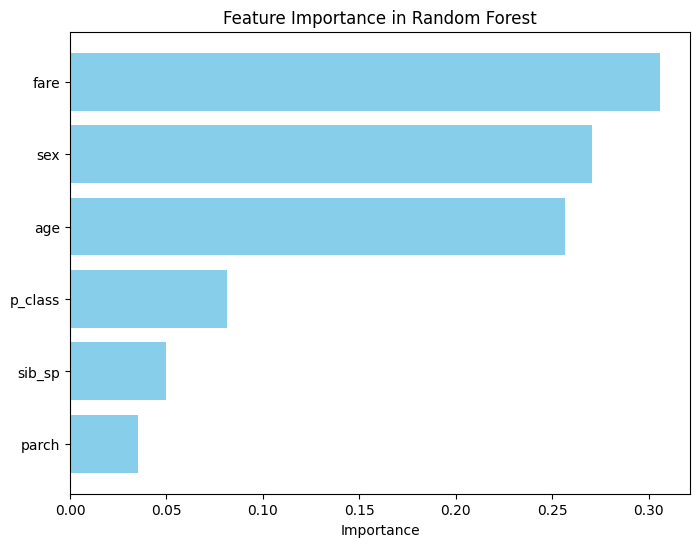

In [45]:
import matplotlib.pyplot as plt

importances = rf_classifier.feature_importances_
feature_names = X.columns

# Create a DataFrame for better visualization
feat_imp = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feat_imp = feat_imp.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(8, 6))
plt.barh(feat_imp['Feature'], feat_imp['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance in Random Forest')
plt.gca().invert_yaxis()
plt.show()


In [46]:
feat_imp.head()

,Feature,Importance
5,fare,0.306183
1,sex,0.270443
2,age,0.256844
0,p_class,0.081404
3,sib_sp,0.049634


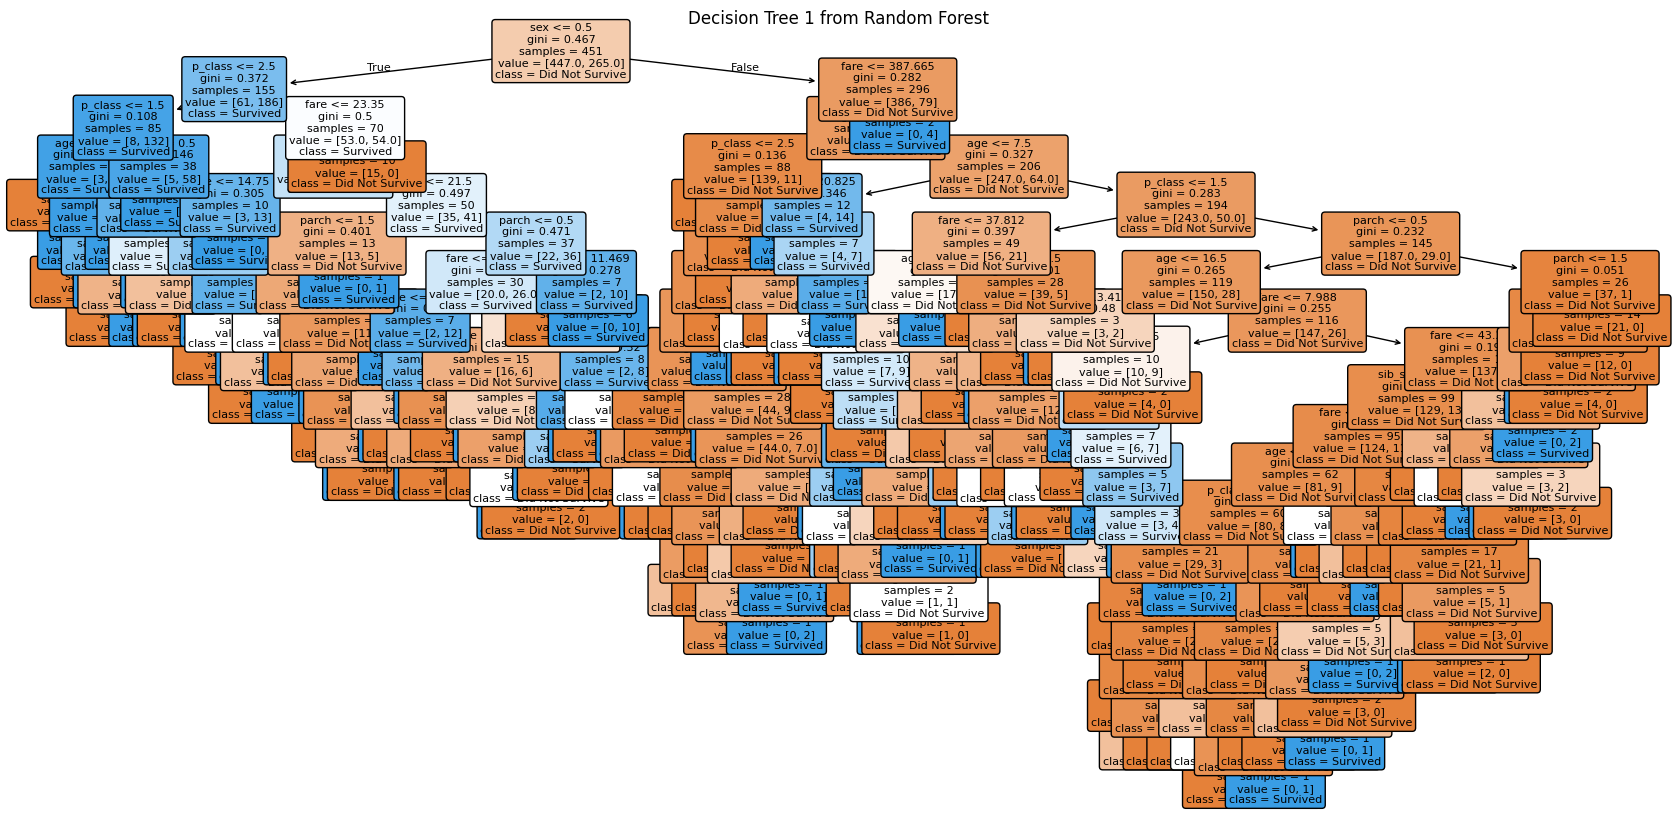

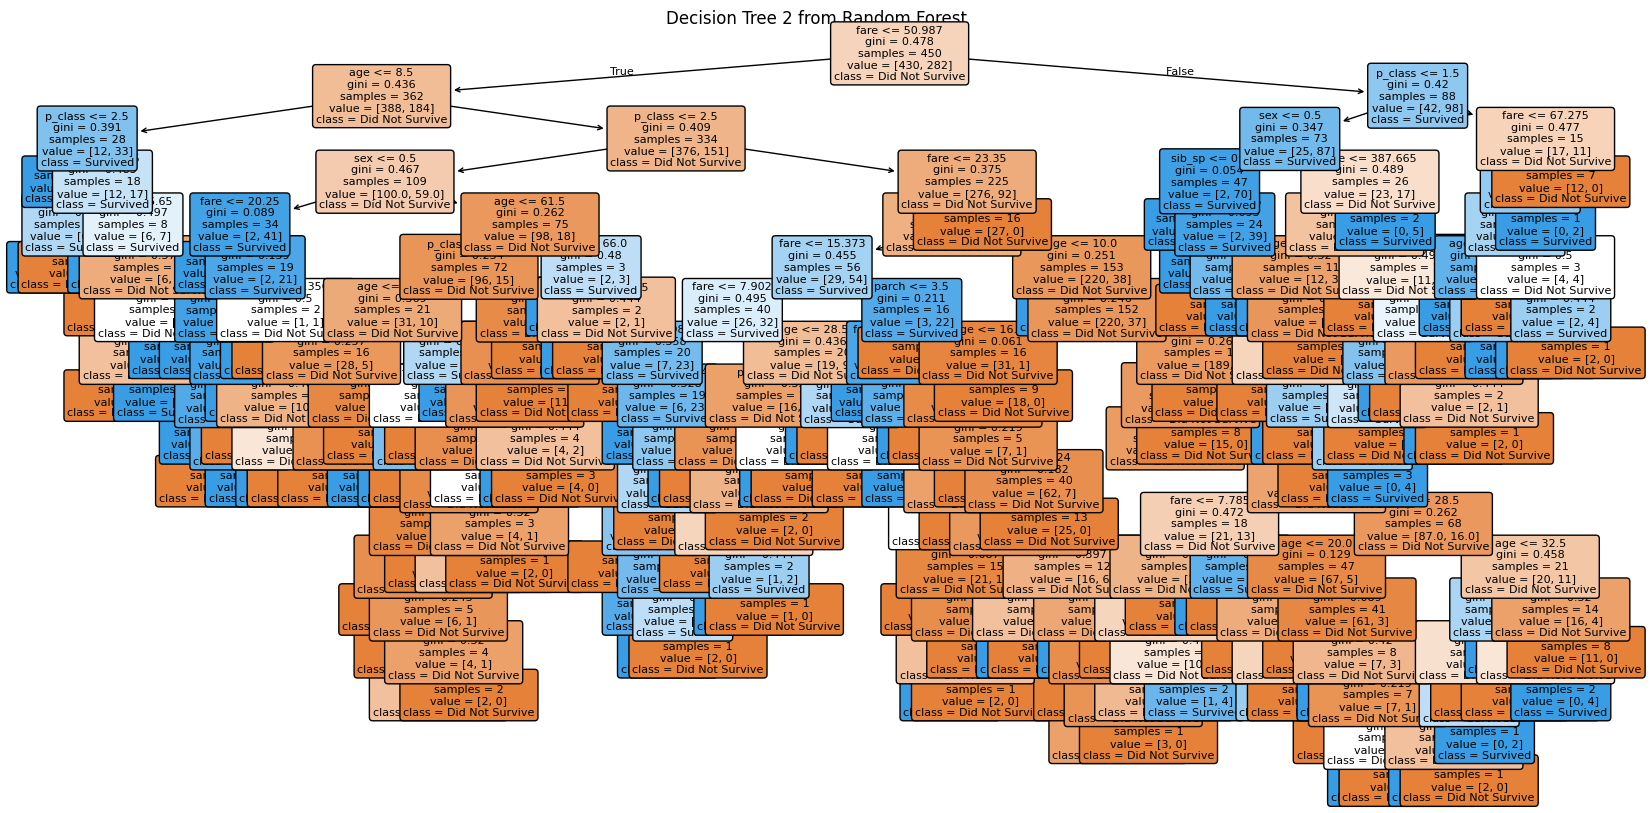

In [47]:
from sklearn.tree import plot_tree

# Plot the first tree
plt.figure(figsize=(20, 10))
plot_tree(rf_classifier.estimators_[0], 
          feature_names=X.columns, 
          class_names=['Did Not Survive', 'Survived'], 
          filled=True, rounded=True, fontsize=8)
plt.title("Decision Tree 1 from Random Forest")
plt.show()

# Plot the second tree
plt.figure(figsize=(20, 10))
plot_tree(rf_classifier.estimators_[1], 
          feature_names=X.columns, 
          class_names=['Did Not Survive', 'Survived'], 
          filled=True, rounded=True, fontsize=8)
plt.title("Decision Tree 2 from Random Forest")
plt.show()


In [48]:
y_pred = rf_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n", classification_rep)

sample = X_test.iloc[0:1]
prediction = rf_classifier.predict(sample)

sample_dict = sample.iloc[0].to_dict()
print(f"\nSample Passenger: {sample_dict}")
print(f"Predicted Survival: {'Survived' if prediction[0] == 1 else 'Did Not Survive'}")

Accuracy: 0.80

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.84      0.83       105
           1       0.76      0.74      0.75        74

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179


Sample Passenger: {'p_class': 3, 'sex': 1, 'age': 28.0, 'sib_sp': 1, 'parch': 1, 'fare': 15.2458}
Predicted Survival: Did Not Survive


In [49]:
sample.to_dict()

{'p_class': {709: 3},
 'sex': {709: 1},
 'age': {709: 28.0},
 'sib_sp': {709: 1},
 'parch': {709: 1},
 'fare': {709: 15.2458}}

In [50]:
sample_dict_sam = sample.to_dict()
print(sample_dict_sam)

{'p_class': {709: 3}, 'sex': {709: 1}, 'age': {709: 28.0}, 'sib_sp': {709: 1}, 'parch': {709: 1}, 'fare': {709: 15.2458}}


In [51]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bagging_model = BaggingClassifier(
    estimator=DecisionTreeClassifier(),
    n_estimators=100,
    random_state=42
)

bagging_model.fit(X_train, y_train)
bagging_pred=bagging_model.predict(X_test)
print("Bagging Classifier Accuracy : ",accuracy_score(y_test,bagging_pred))

Bagging Classifier Accuracy :  0.7932960893854749


In [53]:

from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

imputer = SimpleImputer(strategy="mean")

X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

adaboost_model = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=1),
    n_estimators=100,
    learning_rate=0.1,
    random_state=42
)

adaboost_model.fit(X_train, y_train)
adaboost_pred = adaboost_model.predict(X_test)
accuracy = accuracy_score(y_test, adaboost_pred)
print("AdaBoost Classifier Accuracy:", accuracy)


AdaBoost Classifier Accuracy: 0.776536312849162
